In [425]:
import numpy as np
import math as mt
from PIL import Image as im
from matplotlib import pyplot as plt

raw_image = im.open('./bauckhage-gamma-1.png')
# raw_image = im.open('./bauckhage.jpg')
image = np.array(raw_image)
new_image = np.empty([image[:][0].size, image[0][:].size])
width = image[0][:].size
height = image[:][0].size

In [426]:
init_lev = 256
h = [0] * init_lev
for x in image:
    for pixel_intensity in x:
        h[pixel_intensity] += 1

p = [0] * init_lev
for i, val in enumerate(h):
    p[i] = float(val) / (width * height)

In [427]:
L = 8

In [428]:
a = []
for i in range(L):
    a.append((i + 1) * init_lev / L)


b = []
for i in range(L):
    b.append(i * init_lev / L + init_lev / (2 * L))

In [429]:
def E(a, b):
    sum = 0
    for nu in range(L):
        for x in range(a[nu], a[nu + 1]):
            sum += (x - b[nu]) ** 2 * p[x]
    return sum

In [431]:
T = 1
a_new = a[:]
b_new = b[:]
for t in range(T):    
    for nu in range(len(b_new)):
        numerator = 0
        delimeter = 0
        for x in range(a_new[nu], a_new[nu + 1]):
            numerator += x * p[x]
            delimeter += p[x]
        
        if delimeter == 0:
            b_new[nu] = 0
        else:
            b_new[nu] = numerator / delimeter

    for i in range(1, len(a_new)):
        a_new[i] = int(float((b_new[i] + b_new[i - 1])) / 2)
    
    # print 'a'
    # print a_new
            
    # print 'b'
    # print b_new

    print E(a_new, b_new)
        

IndexError: list index out of range

In [423]:
a_new

[0, 32, 64, 96, 128, 160, 192, 224, 256]

In [424]:
b_new

[16, 48, 80, 112, 144, 176, 208, 240]

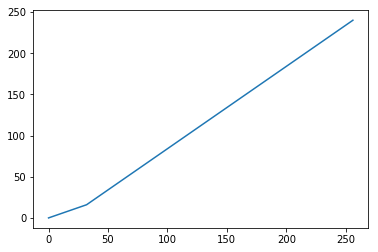

In [367]:
b_plot = b[:]
b_plot = [0] + b_plot
plt.plot(a, b_plot)
plt.show()

In [143]:
a

[0, 32, 64, 96, 128, 160, 192, 224, 256]

In [145]:
b_plot

[0, 16, 48, 80, 112, 144, 176, 208, 240]

In [174]:
len(a)

9

In [175]:
len(b)

8

In [334]:
3 ** 2 * 4 == 36

True